# EDA Final

### The goal of this last piece of your project is to tie everything together from Phase 1 and Phase 2 into an executive summary.  

### Start with a blank Jupyter Notebook and through a combination of Markdown cells and Code cells, put the most relevant parts of your project together. This executive summary will explain your project and highlight your results. Your notebook will need to contain these sections below; consider using the Jupyter Notebook Headings (#, ## or ###) to clearly show the start of each section: 

### Introduction (10 points) 
##### Provide an overview of your project relative to your specific goals. 
##### Explain why this project was important to you. 
##### Explain your hypothesis (or hypotheses) you set out to test. What hunch(es) did you have about the data? 

### Data Explained (10 points) 
##### Provide a link to your data source if applicable. 
##### Give a brief over view of the steps needed to clean the data. 
##### Provide a data dictionary to the final data used in your analysis. 
### Results (20 points) 
##### Read in your final data. 
##### Include code that shows your most important findings. Select at least five analytical processes that highlight your data and your findings. Remember that what you are showing in code is related to your hypotheses/hunches. 
##### This section is a combination of code and a summary of findings. Note that all findings should be clearly written in Markdown cells and should be adjacent to the code cells being explained. 
### Summary (10 points) 
##### Provide a summary of your project. 
##### Were there any difficulties with data or the project as a whole? 
##### Provide your conclusions. 
##### What are possible next steps. 
##### Save your notebook to HTML with the naming format of lastname_Executive_Summary.HTML 
##### Upload your HTML file.

## I. Adding Compute Resources

In [248]:
import subprocess
import psutil
import os
## I am going to be using a c6a.24xlarge EC2 instance/

## Is this absolute overkill? 
## Probably.

## Do I care? 
## No. I have free AWS credits that are expiring soon. 

values = psutil.virtual_memory()
total = values.total >> 30
print(subprocess.check_output("lscpu", shell=True).strip().decode().split("Flags:",1)[0])
print('Total Ram: {} Gb'.format(total))


Architecture:                    x86_64
CPU op-mode(s):                  32-bit, 64-bit
Address sizes:                   48 bits physical, 48 bits virtual
Byte Order:                      Little Endian
CPU(s):                          96
On-line CPU(s) list:             0-95
Vendor ID:                       AuthenticAMD
Model name:                      AMD EPYC 7R13 Processor
CPU family:                      25
Model:                           1
Thread(s) per core:              2
Core(s) per socket:              48
Socket(s):                       1
Stepping:                        1
BogoMIPS:                        5299.98

Total Ram: 184 Gb


## II. Introduction

### Info about the dataset:
The UN Global Trade database is a free, publicly accessible database of international trade statistics that covers both imports and exports by country. The data is organized in three levels of detail:

The UN Global Trade Database contains detailed information on the volume and value of imports and exports for all countries. It cover some 200 categories and include both imports and exports. Imports represent the use by one economy of goods or services produced in another economy, while exports represent the use by one economy of its own goods or services produced for sale to another country.

### Why this is important to me:
The UN Trade Data is important because it helps to track the flow of goods across the world. This data is used to better understand trade patterns, identify countries that are potential trading partners, and monitor how governments are enforcing trade agreements.

As a data scientist, UN trade data is important because it helps someone  understand what's happening in the world. I actually used it in my role of risk analysis at Wells Fargo.

I can use the data to answer questions such as:
What are the most traded goods? 
How is trade changing over time? 
What are the top trading partners? 
What are some of the most interesting trends in trade?

### Hypothesis
I think there are certian factors that impact GDP and I would like to find them and measure their correlations to my base dataset.

## III.Data Explained

##### Link to Data Source: http://data.un.org

#### Data Dictionary
##### Column        Dtype   -- Description 
##### COUNTRY_AREA  object  -- The name of the country.
##### YEAR          int64   -- The year of the trading activity.
##### COMMODITY     object  -- What type of commodity was traded.
##### FLOW          object  -- If the commodity was an import or export.
##### TRADEUSD      float64 -- How much, in USD, was exchanged for the items.
##### WEIGHTKG      float64 -- How much the total trading weighted; if it was measured in KG. 
##### QUANTITYNAME  object  -- The identifier to match with the quantity. It can be Weight in any of the following:
kilograms, No Quantity, Number of items, Volume in litres, Number of packages, Thousands of items, Dozen of items, Volume in cubic meters, Area in square metres, Length in metres, Number of pairs, Electrical energy in thousands of kilowatt-hours, Weight in carats

##### QUANTITY      float64 -- How much of the QUANTITYNAME that was traded.
##### ORIGIN_FILE   object  -- The original highlevel category that this data was pulled from.

### Cleaning the Data:

##### This dataset was quite easy to clean. It was very well kept by the UN. I will have to do some additional cleaning steps after I join it to other datasets that contain potential predictors of trade.

#### This dataset has quite alot of dimensionality. I am going to set out to find if certian metrics of a country can predict its overall trade. 

## III. Data Explained

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_parquet('/home/ubuntu/EDA_Final/UNdata_full.parquet.gzip')
### I am going to rename some columns
df=df.rename(columns={'Country or Area':'Country_Area'})
for i in df.columns:
    df=df.rename(columns={i:i.replace('(','').replace(')','').replace(' ', '').upper()})
df

In [251]:
import pycountry 

def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

df['CODE']=alpha3code(df['COUNTRY_AREA'])
df

,COUNTRY_AREA,YEAR,COMMODITY,FLOW,TRADEUSD,WEIGHTKG,QUANTITYNAME,QUANTITY,ORIGIN_FILE,CODE
0,Afghanistan,2018,"Sweet biscuits, waffles and wafers",Import,9.659279e+06,8310819.00,Weight in kilograms,8310819.00,UNdata19,AFG
1,Albania,2018,"Infant foods of cereals, flour, starch or milk...",Import,1.034729e+06,104542.60,Weight in kilograms,104542.60,UNdata19,ALB
2,Albania,2018,"Mixes and doughs for bread, pastry, biscuits, ...",Import,1.201180e+06,586785.15,Weight in kilograms,586785.15,UNdata19,ALB
3,Albania,2018,Malt extract & limited cocoa pastrycooks produ...,Import,1.521576e+06,619217.12,Weight in kilograms,619217.12,UNdata19,ALB
4,Albania,2018,Uncooked egg pasta not stuffed or prepared,Import,6.307901e+05,290356.00,Weight in kilograms,290356.00,UNdata19,ALB
...,...,...,...,...,...,...,...,...,...,...
8410651,Sweden,2012,"Bovine and equine leather, full or split grain...",Import,1.821299e+07,658146.00,Weight in kilograms,658146.00,UNdata41,SWE
8410652,Sweden,2012,"Bovine and equine leather, full or split grain...",Export,5.147759e+07,1089197.00,Weight in kilograms,1089197.00,UNdata41,SWE
8410653,Sweden,2012,"Bovine and equine leather, nes",Import,3.972237e+06,196520.00,Weight in kilograms,196520.00,UNdata41,SWE
8410654,Sweden,2012,"Bovine and equine leather, nes",Export,4.652490e+05,10265.00,Weight in kilograms,10265.00,UNdata41,SWE


In [280]:
import geopandas
world =  geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns=['POPULATION_EST', 'CONTINENT', 'NAME', 'CODE', 'GDP_EST', 'GEOMETRY']
world=pd.DataFrame(world)
del world['NAME']
world
### this data is for the most recent fiscal year but we can look at the current data as being the result of the last years of trade.

,POPULATION_EST,CONTINENT,CODE,GDP_EST,GEOMETRY
0,889953.0,Oceania,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
172,6944975.0,Europe,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [281]:
df_agg=df.groupby(['COUNTRY_AREA', 'CODE', 'YEAR', 'FLOW', 'QUANTITYNAME'], as_index=False)[['QUANTITY', 'WEIGHTKG', 'TRADEUSD']].sum()
df_agg=pd.merge(df_agg, world, how='left')
df_agg

,COUNTRY_AREA,CODE,YEAR,FLOW,QUANTITYNAME,QUANTITY,WEIGHTKG,TRADEUSD,POPULATION_EST,CONTINENT,GDP_EST,GEOMETRY
0,Afghanistan,AFG,2008,Export,Area in square metres,5.979993e+06,1.351000e+03,1.496229e+08,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Afghanistan,AFG,2008,Export,No Quantity,0.000000e+00,0.000000e+00,6.122461e+08,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,Afghanistan,AFG,2008,Export,Weight in kilograms,2.454800e+04,2.454800e+04,3.182621e+08,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Afghanistan,AFG,2008,Import,No Quantity,0.000000e+00,4.631000e+03,4.965180e+09,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Afghanistan,AFG,2008,Import,Number of items,5.364127e+06,1.668290e+05,1.661671e+08,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...,...,...,...,...,...
56218,Zimbabwe,ZWE,2018,Export,Number of items,2.630972e+05,2.173763e+05,6.851796e+06,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
56219,Zimbabwe,ZWE,2018,Export,Weight in kilograms,1.394188e+09,1.393277e+09,1.988200e+09,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
56220,Zimbabwe,ZWE,2018,Import,No Quantity,0.000000e+00,1.518002e+06,6.331634e+09,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
56221,Zimbabwe,ZWE,2018,Import,Number of items,2.182123e+06,7.766519e+06,2.710028e+07,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


### Cleaning Data

In [282]:
df_agg[df_agg['GEOMETRY'].isnull()]['COUNTRY_AREA'].unique()

array(['Andorra', 'Anguilla', 'Antigua and Barbuda', 'Aruba', 'Bahrain',
       'Barbados', 'Belgium', 'Bermuda',
       'Bolivarian Republic of Venezuela',
       'Bolivia (Plurinational State of)', 'Bosnia', 'Cape Verde',
       'Cayman Islands', 'Central African Republicblic',
       'Commonwealth of Dominica',
       'Commonwealth of Dominican Republicblic', 'Cook Islands',
       'Czech Republicblic', 'Ellice Islands', 'Faeroe Islands',
       'Fmr Fed. Republic of Germany', 'France', 'Grenada', 'Guadeloupe',
       'Guyane', 'Hong Kong', 'Islamic Republic of Iran', 'Israel',
       'Kingdom of Tonga', 'Korea', 'Lao People’s Democratic Republic',
       'Macao', 'Martinique', 'Mayotte', 'Micronesia', 'Moldova',
       'Montserrat', 'Netherlands Antilles', 'North Macedonia',
       'Other Asia, nes', 'Polynesia', 'Republic of Maldives',
       'Republic of Malta', 'Republic of Mauritius', 'Republic of Palau',
       'Republic of Republic of Kiribati', 'Republic of Seychelles',
    

In [283]:
## this helps: https://www.un.int/protocol/sites/www.un.int/files/Protocol%20and%20Liaison%20Service/officialnamesofcountries.pdf

df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('United Rep. of Tanzania', 'Tanzania')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Belgium-Luxembourg', 'Belgium') ### I will count luxembourg as belgium for simplicity
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Bosnia Herzegovina', 'Bosnia')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Central African Rep.', 'Central African Republic')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Cayman Isds', 'Cayman Islands')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Cabo Verde', 'Cape Verde') ## Fun Fact: As time passed, the name was anglicized to Cape Verde. 
### Since 2013, the government decided that the Portuguese Cabo Verde would henceforth be used for official purposes, and requests that the rest of the world respects this name change.

df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('China, Hong Kong SAR', 'Hong Kong')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('China, Macao SAR', 'Macao')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Comoros', 'Union of the Comoros')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Cook Isds', 'Cook Islands')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Czech Rep.', 'Czech Republic')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Dominica', 'Commonwealth of Dominica')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Dominican Rep.', 'Dominican Republic')

## it looks like EU-28 which I think is an aggregate of the 28 member countries. I am going to drop it
df=df[df['COUNTRY_AREA']!='EU-28'].reset_index(drop=True)


df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('FS Micronesia', 'Micronesia')

## i am going to replace Isds with Islands and rep. with Republic. I will skip the next ones I see
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Isds', 'Islands')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Rep.', 'Republic')


df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Fmr Fed. Rep. of Germany', 'Germany')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Fmr Sudan', 'South Sudan')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('French Guiana', 'Guyane')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('French Polynesia', 'Polynesia')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Iran', 'Islamic Republic of Iran')

df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Kiribati', 'Republic of Kiribati')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace("Lao People's Dem. Republic", "Lao People’s Democratic Republic")
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Maldives', 'Republic of Maldives')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Kiribati', 'Republic of Kiribati')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Malta', 'Republic of Malta')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Mauritius', 'Republic of Mauritius')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Neth. Antilles', 'Netherlands Antilles')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Palau', 'Republic of Palau')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Republic of Korea', 'Korea')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Republic of Moldova', 'Moldova')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Réunion', 'France')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Saint Kitts and Nevis', 'Saint Kitts')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Saint Vincent and the Grenadines', 'St.Vincent and the Grenadines') ## trying whatever I think might work
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Samoa', 'United States')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Sao Tome and Principe', 'São Tomé and Príncipe')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Serbia and Montenegro', 'Serbia')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Seychelles', 'Republic of Seychelles')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Singapore', 'Republic of Singapore')

## So. African Customs Union is a union of 5 countries so an aggregate. I am removing it. 
df=df[df['COUNTRY_AREA']!='So. African Customs Union']


df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('State of Palestine', 'Israel') ## no way meant to be political but it would be too hard to differentiate them. 
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Syria', 'Syrian Arab Republic')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('TFYR of Macedonia', 'North Macedonia')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Tonga', 'Kingdom of Tonga')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Tuvalu', 'Ellice Islands')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('USA', 'United States')
df['COUNTRY_AREA']=df['COUNTRY_AREA'].str.replace('Venezuela', 'Bolivarian Republic of Venezuela')

/tmp/ipykernel_5266/3325820555.py:3: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:6: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:15: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:17: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:27: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:30: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:37: FutureWarning:

The default value of regex will change from True to False in a future version.

/tmp/ipykernel_5266/3325820555.py:42: FutureWarning:

The defaul

In [286]:
def null_fix(code, null, new_name):
    if null == True:
        return pycountry.countries.get(name=new_name).alpha_3
    else:
        return code
df['NULL']=df['CODE'].isnull()
df['CODE']=df.apply(
    lambda x: null_fix(x['CODE'], x['NULL'], x['COUNTRY_AREA']), axis=1)

def usa_fix(code, new_name):
    if new_name=='United States':
        return('USA')
    else:
        return code
        
df['CODE']=df.apply(
    lambda x: usa_fix(x['CODE'], x['COUNTRY_AREA']), axis=1)

In [299]:
### I will focus on 2018 and only KG QUANTITIES.

df_agg=df[df['YEAR']==2018]
df_agg=df_agg[df_agg['FLOW'].isin(['Import', 'Export'])]

df_agg=df_agg.groupby(['COUNTRY_AREA', 'CODE', 'FLOW', 'QUANTITYNAME'], as_index=False)[['QUANTITY', 'WEIGHTKG', 'TRADEUSD']].sum()

df_agg=pd.merge(df_agg, world, how='left', left_on='CODE', right_on='CODE')
df_agg=df_agg.dropna()
df_agg

,COUNTRY_AREA,CODE,FLOW,QUANTITYNAME,QUANTITY,WEIGHTKG,TRADEUSD,POPULATION_EST,CONTINENT,GDP_EST,GEOMETRY
0,Afghanistan,AFG,Export,Area in square metres,6.833587e+05,4.311635e+05,2.233701e+07,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Afghanistan,AFG,Export,Length in metres,3.901900e+04,0.000000e+00,8.189844e+04,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,Afghanistan,AFG,Export,No Quantity,0.000000e+00,1.530401e+03,1.190941e+09,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Afghanistan,AFG,Export,Number of items,1.641930e+04,1.903365e+04,9.405982e+05,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Afghanistan,AFG,Export,Number of pairs,5.993000e+03,0.000000e+00,1.041855e+04,38041754.0,Asia,19291.0,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...,...,...,...,...
1674,Zimbabwe,ZWE,Export,Number of items,2.630972e+05,2.173763e+05,6.851796e+06,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
1675,Zimbabwe,ZWE,Export,Weight in kilograms,1.394188e+09,1.393277e+09,1.988200e+09,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
1676,Zimbabwe,ZWE,Import,No Quantity,0.000000e+00,1.518002e+06,6.331634e+09,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
1677,Zimbabwe,ZWE,Import,Number of items,2.182123e+06,7.766519e+06,2.710028e+07,14645468.0,Africa,21440.0,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [304]:
for i in ['QUANTITY','WEIGHTKG','TRADEUSD','POPULATION_EST','GDP_EST']:
    df_agg[i]=df_agg[i].astype(float)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_agg

,COUNTRY_AREA,CODE,FLOW,QUANTITYNAME,QUANTITY,WEIGHTKG,TRADEUSD,POPULATION_EST,CONTINENT,GDP_EST,GEOMETRY
0,Afghanistan,AFG,Export,Area in square metres,683358.70,431163.49,22337014.73,38041754.00,Asia,19291.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,Afghanistan,AFG,Export,Length in metres,39019.00,0.00,81898.44,38041754.00,Asia,19291.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
2,Afghanistan,AFG,Export,No Quantity,0.00,1530.40,1190941056.95,38041754.00,Asia,19291.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
3,Afghanistan,AFG,Export,Number of items,16419.30,19033.65,940598.18,38041754.00,Asia,19291.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
4,Afghanistan,AFG,Export,Number of pairs,5993.00,0.00,10418.55,38041754.00,Asia,19291.00,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
...,...,...,...,...,...,...,...,...,...,...,...
1674,Zimbabwe,ZWE,Export,Number of items,263097.16,217376.27,6851796.33,14645468.00,Africa,21440.00,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
1675,Zimbabwe,ZWE,Export,Weight in kilograms,1394187842.04,1393276874.95,1988200048.67,14645468.00,Africa,21440.00,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
1676,Zimbabwe,ZWE,Import,No Quantity,0.00,1518002.36,6331634066.22,14645468.00,Africa,21440.00,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."
1677,Zimbabwe,ZWE,Import,Number of items,2182122.77,7766518.69,27100281.50,14645468.00,Africa,21440.00,"POLYGON ((31.19141 -22.25151, 30.65987 -22.151..."


In [305]:
df_agg[df_agg['CODE']=='USA']

,COUNTRY_AREA,CODE,FLOW,QUANTITYNAME,QUANTITY,WEIGHTKG,TRADEUSD,POPULATION_EST,CONTINENT,GDP_EST,GEOMETRY
1647,United States,USA,Export,Area in square metres,634.00,0.00,713.92,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1648,United States,USA,Export,No Quantity,0.00,125957323.73,1878033245333.59,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1649,United States,USA,Export,Number of items,190779089.16,16087623.83,7662348148.22,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1650,United States,USA,Export,Weight in kilograms,167492974551.36,167492933607.95,62079840035.93,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1651,United States,USA,Import,Area in square metres,38077.81,20389.98,146718.85,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1652,United States,USA,Import,No Quantity,0.00,3345167216.11,2734801881692.44,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1653,United States,USA,Import,Number of items,2567612760.66,1309863779.50,20005460824.15,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
1654,United States,USA,Import,Weight in kilograms,42312417371.34,41822905234.08,70225683581.77,328239523.00,North America,21433226.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


### Lets see how trade is correlated to various metrics

In [306]:
import plotly.graph_objects as go
import plotly.offline as py
from IPython.display import clear_output
import pandas as pd
from ipywidgets import interactive, HBox, VBox, widgets, interact
py.init_notebook_mode()

fig = go.Figure(data=go.Choropleth(
    locations = df_agg[df_agg['FLOW']=='Export']['CODE'],
    z = df_agg[df_agg['FLOW']=='Export']['TRADEUSD'],
    text = df_agg[df_agg['FLOW']=='Export']['COUNTRY_AREA'],
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$'))

fig.update_layout(
    height=800,
    title="Trade Export by Country",
    margin={"r":0,"t":100,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        
    )
)
clear_output()
py.iplot(fig)


In [307]:
import plotly.graph_objects as go
import plotly.offline as py
from IPython.display import clear_output
import pandas as pd
from ipywidgets import interactive, HBox, VBox, widgets, interact
py.init_notebook_mode()

fig = go.Figure(data=go.Choropleth(
    locations = df_agg[df_agg['FLOW']=='Import']['CODE'],
    z = df_agg[df_agg['FLOW']=='Import']['TRADEUSD'],
    text = df_agg[df_agg['FLOW']=='Import']['COUNTRY_AREA'],
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$'))

fig.update_layout(
    height=800,
    title="Trade Import by Country",
    margin={"r":0,"t":100,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        
    )
)
clear_output()
py.iplot(fig)


In [312]:
import plotly.graph_objects as go
import plotly.offline as py
from IPython.display import clear_output
import pandas as pd
from ipywidgets import interactive, HBox, VBox, widgets, interact
py.init_notebook_mode()
gdp=df_agg[['CODE', 'COUNTRY_AREA', 'GDP_EST', 'POPULATION_EST']].drop_duplicates()
fig = go.Figure(data=go.Choropleth(
    locations = gdp['CODE'],
    z = gdp['GDP_EST'],
    text = gdp['COUNTRY_AREA'],
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$'))

fig.update_layout(
    height=800,
    title="GDP by Country",
    margin={"r":0,"t":100,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        
    )
)
clear_output()
py.iplot(fig)


In [313]:
import plotly.graph_objects as go
import plotly.offline as py
from IPython.display import clear_output
import pandas as pd
from ipywidgets import interactive, HBox, VBox, widgets, interact
py.init_notebook_mode()

fig = go.Figure(data=go.Choropleth(
    locations = gdp['CODE'],
    z = gdp['POPULATION_EST'],
    text = gdp['COUNTRY_AREA'],
    colorscale = 'RdBu',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '$'))

fig.update_layout(
    height=800,
    title="Population by Country",
    margin={"r":0,"t":100,"l":0,"b":0},
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular',
        
    )
)
clear_output()
py.iplot(fig)


In [321]:
import seaborn as sns
import_df=df_agg[df_agg['FLOW']=='Import'].groupby(['CODE', 'CONTINENT', 'GDP_EST', 'POPULATION_EST'], as_index=False)[['TRADEUSD']].sum()
export_df=df_agg[df_agg['FLOW']=='Export'].groupby(['CODE', 'CONTINENT', 'GDP_EST', 'POPULATION_EST'], as_index=False)[['TRADEUSD']].sum()
import_df

,CODE,CONTINENT,GDP_EST,POPULATION_EST,TRADEUSD
0,AFG,Asia,19291.00,38041754.00,14813180649.50
1,AGO,Africa,88815.00,31825295.00,32706121435.46
2,ALB,Europe,15279.00,2854191.00,11882573898.97
3,ARE,Asia,421142.00,9770529.00,260552532150.98
4,ARG,South America,445445.00,44938712.00,130881932331.28
...,...,...,...,...,...
98,USA,North America,21433226.00,328239523.00,2825033172817.21
99,UZB,Asia,57921.00,33580650.00,18830192264.57
100,ZAF,Africa,351431.00,58558270.00,106341593694.83
101,ZMB,Africa,23309.00,17861030.00,11022754806.72


Text(0.5, 0.98, 'IMPORT CORRELATIONS')

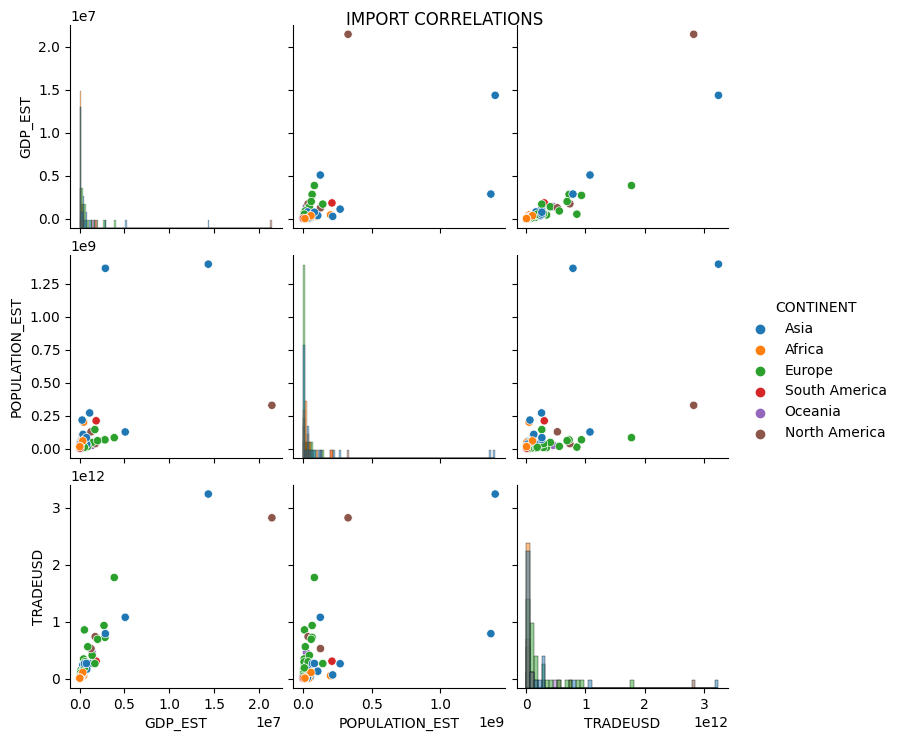

In [324]:
g=sns.pairplot(import_df, hue="CONTINENT", diag_kind="hist")
g.fig.suptitle("IMPORT CORRELATIONS")

Text(0.5, 0.98, 'EXPORT CORRELATIONS')

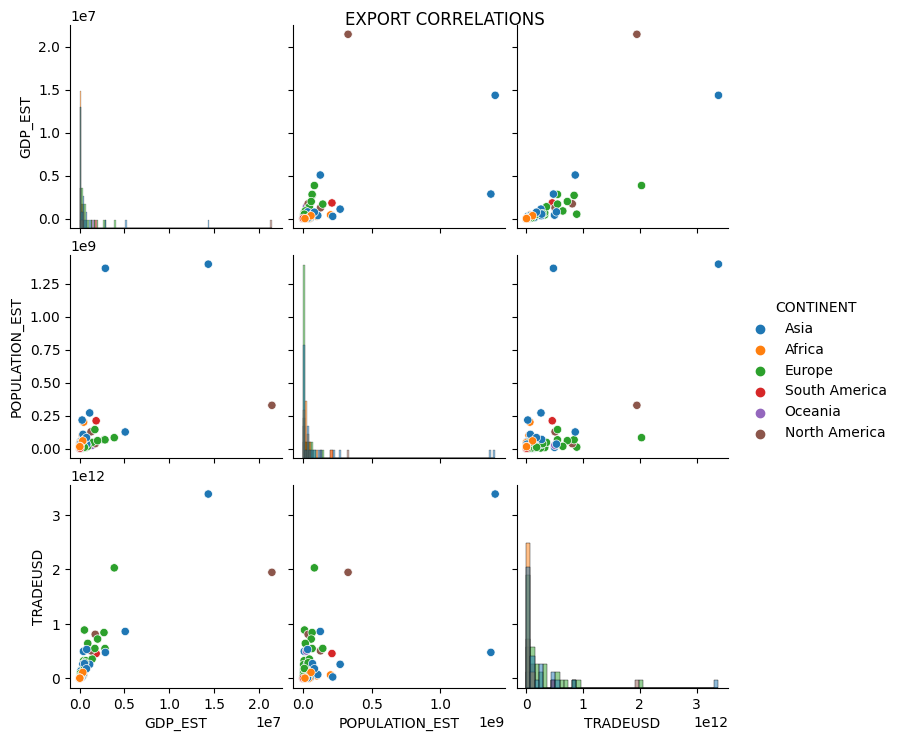

In [323]:
g=sns.pairplot(export_df, hue="CONTINENT", diag_kind="hist")
g.fig.suptitle("EXPORT CORRELATIONS")

Text(0.5, 0.98, 'IMPORT CONTINENT CORRELATIONS')

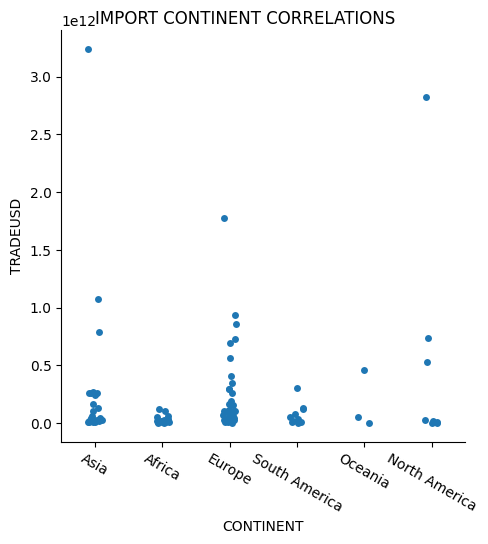

In [332]:
g = sns.catplot(data=import_df, x="CONTINENT", y="TRADEUSD")
g.fig.suptitle("IMPORT CONTINENT CORRELATIONS")
g.set_xticklabels(rotation=-30)


Text(0.5, 0.98, 'EXPORT CONTINENT CORRELATIONS')

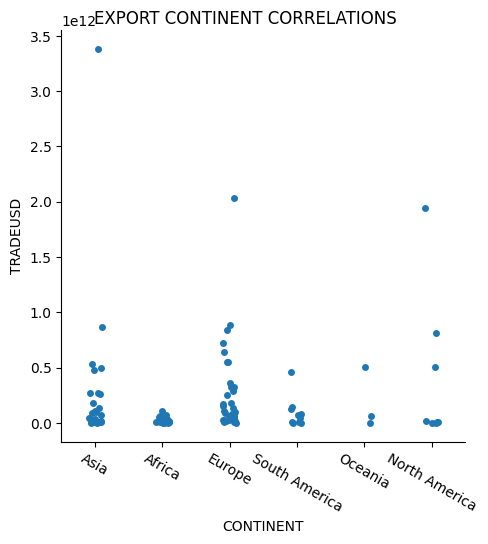

In [331]:
g = sns.catplot(data=export_df, x="CONTINENT", y="TRADEUSD")
g.fig.suptitle("EXPORT CONTINENT CORRELATIONS")
g.set_xticklabels(rotation=-30)


### IV.SUMMARY

### Summary of Project
#### This project turned out to be quite difficult. It was hard to denoise the data and I had to move to a simpler hypothesis. 
#### I could have employed some dimensionality reduction techniques but that would have taken quite some time. 
#### Additionally, preparing computing resources for this large dataset turned out to be quite difficult as well. 

### Some final Conclusions
##### It looks like there are a number of obvious factors that have an impact on a country's import and exports. The primary one being pretty obvious, a countries gross domestic product. 
##### It also appears that there are additional factors such as a countries population and Continent have some impact.
##### The primary issue with this data is the dimensionality of the various trading categories and it is quite hare to look at as a whole.
#### this makes sense because it is excompassing so complex as a whole. Global trading. 

### Next Steps

### Summary (10 points) 
##### Provide a summary of your project. 
##### Were there any difficulties with data or the project as a whole? 
##### Provide your conclusions. 
##### What are possible next steps. 
##### Save your notebook to HTML with the naming format of lastname_Executive_Summary.HTML 
##### Upload your HTML file.